In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('time_series_60min_singleindex.csv')

In [3]:
df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [4]:
df_solar = df[['utc_timestamp', 'AT_solar_generation_actual']]
df_solar.head()

,utc_timestamp,AT_solar_generation_actual
0,2014-12-31T23:00:00Z,NaN
1,2015-01-01T00:00:00Z,NaN
2,2015-01-01T01:00:00Z,NaN
3,2015-01-01T02:00:00Z,NaN
4,2015-01-01T03:00:00Z,NaN


In [5]:
df_solar.rename(columns={'utc_timestamp': 'ds', 'AT_solar_generation_actual': 'y'}, inplace=True)
df_solar.head()

C:\Users\Qc\AppData\Local\Temp\ipykernel_9756\433031931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar.rename(columns={'utc_timestamp': 'ds', 'AT_solar_generation_actual': 'y'}, inplace=True)


,ds,y
0,2014-12-31T23:00:00Z,NaN
1,2015-01-01T00:00:00Z,NaN
2,2015-01-01T01:00:00Z,NaN
3,2015-01-01T02:00:00Z,NaN
4,2015-01-01T03:00:00Z,NaN


In [6]:
df_solar['ds'] = pd.to_datetime(df_solar['ds']).dt.tz_localize(None)
df_solar.head()

C:\Users\Qc\AppData\Local\Temp\ipykernel_9756\4258116284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar['ds'] = pd.to_datetime(df_solar['ds']).dt.tz_localize(None)


,ds,y
0,2014-12-31 23:00:00,NaN
1,2015-01-01 00:00:00,NaN
2,2015-01-01 01:00:00,NaN
3,2015-01-01 02:00:00,NaN
4,2015-01-01 03:00:00,NaN


In [7]:
df_solar['y'].interpolate(method='linear', inplace=True)
df_solar.head()

C:\Users\Qc\AppData\Local\Temp\ipykernel_9756\4112595894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar['y'].interpolate(method='linear', inplace=True)


,ds,y
0,2014-12-31 23:00:00,NaN
1,2015-01-01 00:00:00,NaN
2,2015-01-01 01:00:00,NaN
3,2015-01-01 02:00:00,NaN
4,2015-01-01 03:00:00,NaN


In [8]:
from prophet import Prophet

# Train Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_solar)

# Generate forecasts
#forecast = model.predict(df_solar)

# Extract Prophet components
#df_features = forecast[['ds', 'yhat', 'trend', 'weekly', 'yearly', 'additive_terms']]


C:\Users\Qc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:46:51 - cmdstanpy - INFO - Chain [1] start processing
23:48:02 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Create a DataFrame for future dates (e.g., next 365 days)
future = model.make_future_dataframe(periods=365, freq='D')

# Optional: Check the future DataFrame
print(future.tail())


                       ds
50761 2021-09-26 23:00:00
50762 2021-09-27 23:00:00
50763 2021-09-28 23:00:00
50764 2021-09-29 23:00:00
50765 2021-09-30 23:00:00


In [10]:
# Make predictions
forecast = model.predict(future)

# Optional: Check the forecast DataFrame
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


                       ds       yhat  yhat_lower  yhat_upper
50761 2021-09-26 23:00:00 -78.826727 -381.769335  193.045111
50762 2021-09-27 23:00:00 -82.091051 -366.358188  201.449168
50763 2021-09-28 23:00:00 -83.341550 -379.660927  198.087048
50764 2021-09-29 23:00:00 -83.322713 -392.094503  193.397113
50765 2021-09-30 23:00:00 -84.839322 -380.885230  188.601160


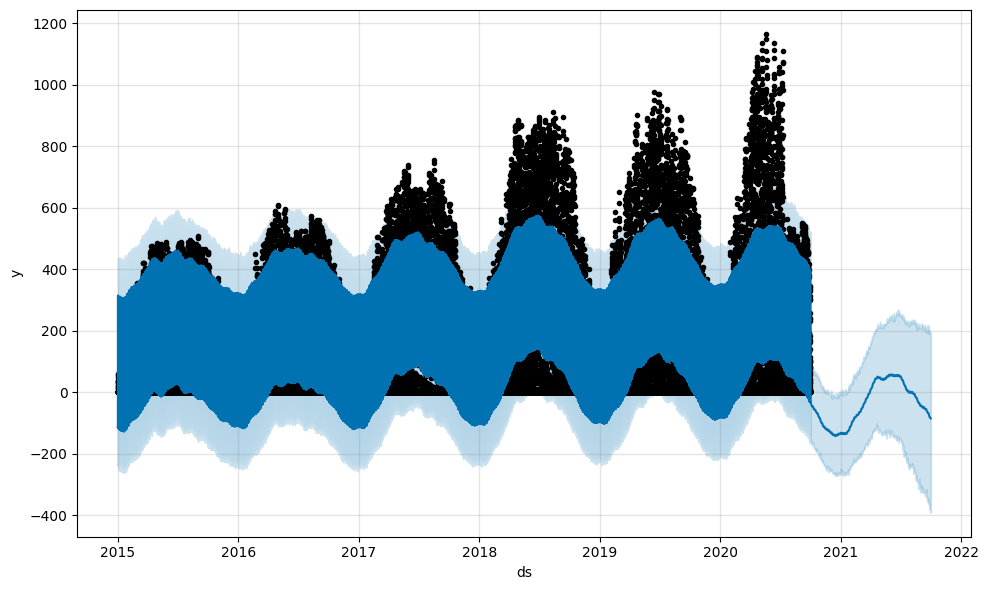

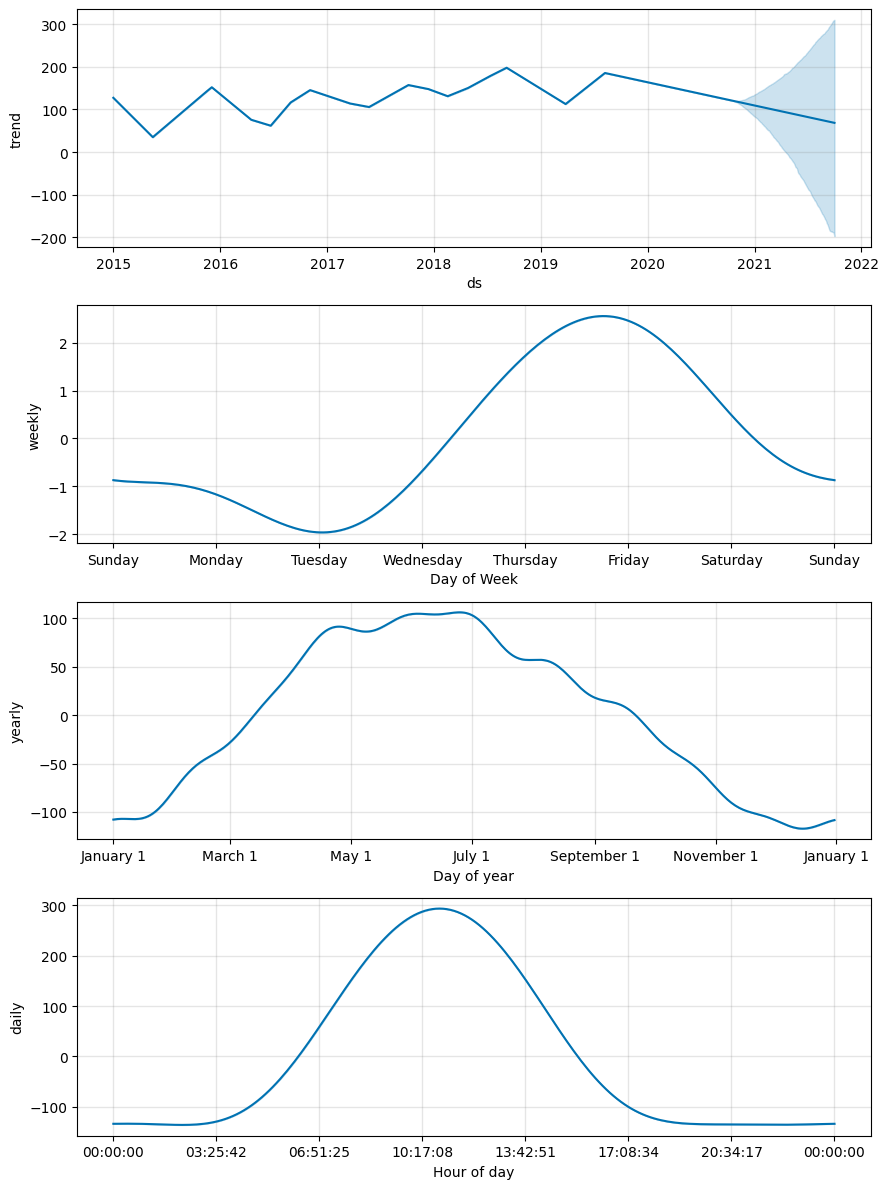

In [11]:
import matplotlib.pyplot as plt

# Plot the forecast
model.plot(forecast)
plt.show()

# Plot the components (trend, seasonality, etc.)
model.plot_components(forecast)
plt.show()


In [12]:
from prophet.diagnostics import cross_validation, performance_metrics

# Cross-validation
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='365 days')

# Performance metrics
df_p = performance_metrics(df_cv)
print(df_p[['horizon', 'mae', 'rmse']])


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                            | 0/8 [00:00<?, ?it/s]23:48:26 - cmdstanpy - INFO - Chain [1] start processing
23:48:28 - cmdstanpy - INFO - Chain [1] done processing
 12%|██████████▌                                                                         | 1/8 [00:09<01:06,  9.46s/it]23:48:35 - cmdstanpy - INFO - Chain [1] start processing
23:48:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|█████████████████████                                                               | 2/8 [00:19<00:57,  9.62s/it]23:48:46 - cmdstanpy - INFO - Chain [1] start processing
23:48:51 - cmdstanpy - INFO - Chain [1] done processing
 38%|███████████████████████████████▌                                                    | 3/8 [00:32<00:57, 11.40s/it]23:49:00 - cmdstanpy - INFO - Chain [1] start processing
23:49:16 - cmdstanpy - I

               horizon        mae        rmse
0     36 days 12:00:00  70.607964  100.035194
1     36 days 13:00:00  70.647626  100.082527
2     36 days 14:00:00  70.696692  100.123057
3     36 days 15:00:00  70.752690  100.160577
4     36 days 16:00:00  70.789837  100.184198
...                ...        ...         ...
7880 364 days 20:00:00  87.961412  113.838142
7881 364 days 21:00:00  87.972039  113.844197
7882 364 days 22:00:00  87.950490  113.828645
7883 364 days 23:00:00  87.876189  113.762015
7884 365 days 00:00:00  87.785277  113.677886

[7885 rows x 3 columns]
